In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from matplotlib import pyplot as plt

In [3]:
#Read/Use Clean DataFrame
person_df = pd.read_csv("../person.CSV")
vehicle_df = pd.read_csv("../vehicle.CSV")
accident_df = pd.read_csv("../accident.CSV")
distract_df = pd.read_csv("../distract.CSV")

In [4]:
#Only keeping certain columns from person dataframe
people_df = person_df[['CASENUM', 'PER_NO', 'SEXNAME', 'AGE', 'AIR_BAGNAME', 'DRINKINGNAME', 'REST_USENAME', 'VEH_NO']]
people_df

,CASENUM,PER_NO,SEXNAME,AGE,AIR_BAGNAME,DRINKINGNAME,REST_USENAME,VEH_NO
0,201901174219,1,Male,39,Not Deployed,No (Alcohol Not Involved),Shoulder and Lap Belt Used,1
1,201901176655,1,Male,20,Not Deployed,Not Reported,Shoulder and Lap Belt Used,1
2,201901176655,2,Male,19,Not Deployed,Not Reported,None Used/Not Applicable,1
3,201901176655,3,Male,999,Not Deployed,Not Reported,Reported as Unknown,1
4,201901176655,4,Male,999,Not Deployed,Not Reported,Reported as Unknown,1
...,...,...,...,...,...,...,...,...
135405,201902285953,1,Female,69,Not Deployed,Not Reported,Shoulder and Lap Belt Used,2
135406,201902285953,2,Male,44,Not Deployed,Not Reported,Shoulder and Lap Belt Used,2
135407,201902285965,1,Female,56,Deployment- Unknown Location,Not Reported,Shoulder and Lap Belt Used,1
135408,201902285965,1,Male,42,Not Deployed,Not Reported,Shoulder and Lap Belt Used,2


In [5]:
#Creating new vehicle dataframe with only certain columns
new_vehicle_df = vehicle_df[['CASENUM', 'MAKENAME', 'MAK_MODNAME', 'MOD_YEAR', 'TRAV_SPNAME', 'VEH_NO']]
new_vehicle_df

,CASENUM,MAKENAME,MAK_MODNAME,MOD_YEAR,TRAV_SPNAME,VEH_NO
0,201901174219,Ford,Ford Ranger,2006,Not Reported,1
1,201901176655,Dodge,Dodge Dart (2013 on. See model 001 for 1960-19...,2015,Not Reported,1
2,201901176655,Honda,Honda CR-V,2006,Not Reported,2
3,201901176667,Nissan/Datsun,Nissan/Datsun Xterra,2000,040 MPH,1
4,201901176667,Chevrolet,"Chevrolet C, K, R, V-series pickup/Silverado",1979,Not Reported,2
...,...,...,...,...,...,...
96712,201902285945,Chrysler,Chrysler PT Cruiser,2004,010 MPH,1
96713,201902285953,Ford,Ford F-Series pickup,2015,015 MPH,1
96714,201902285953,Honda,Honda Pilot,2004,015 MPH,2
96715,201902285965,KIA,KIA Rio/Rio5,2019,035 MPH,1


In [6]:
#Creating new accident dataframe with only certain columns
new_accident_df = accident_df[['CASENUM', 'STRATUMNAME', 'REGIONNAME', 'URBANICITY', 'MONTHNAME', 'ALCOHOLNAME', 'HARM_EVNAME', 'WEATHERNAME',
                      'HOUR', 'REL_ROADNAME', 'MAN_COLLNAME', 'MAX_SEVNAME']]
new_accident_df

,CASENUM,STRATUMNAME,REGIONNAME,URBANICITY,MONTHNAME,ALCOHOLNAME,HARM_EVNAME,WEATHERNAME,HOUR,REL_ROADNAME,MAN_COLLNAME,MAX_SEVNAME
0,201901174219,Stratum 10 - Other,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,No Alcohol Involved,Curb,Cloudy,8,On Median,The First Harmful Event was Not a Collision wi...,No Apparent Injury (O)
1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,Angle,Possible Injury (C)
2,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,Angle,Suspected Minor Injury (B)
3,201901176694,Stratum 9 - LMY PV No Injuries in Crash,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,No Alcohol Involved,Traffic Sign Support,Clear,4,On Roadside,The First Harmful Event was Not a Collision wi...,No Apparent Injury (O)
4,201901176702,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,No Alcohol Involved,Motor Vehicle In-Transport,Clear,9,On Roadway,Angle,Possible Injury (C)
...,...,...,...,...,...,...,...,...,...,...,...,...
54404,201902285920,Stratum 8 - NLMY PV Minor Injury,"West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...",1,December,No Alcohol Involved,Parked Motor Vehicle,Cloudy,22,In Parking Lane/Zone,The First Harmful Event was Not a Collision wi...,Suspected Minor Injury (B)
54405,201902285944,Stratum 7 - M/H Truck or Bus,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,5,On Roadway,Front-to-Rear,No Apparent Injury (O)
54406,201902285945,Stratum 10 - Other,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Concrete Traffic Barrier,Clear,16,On Median,The First Harmful Event was Not a Collision wi...,No Apparent Injury (O)
54407,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,Sideswipe - Same Direction,No Apparent Injury (O)


In [7]:
#Creating new distract dataframe with only certain columns
new_distract_df = distract_df[['CASENUM', 'MDRDSTRDNAME']]
new_distract_df

,CASENUM,MDRDSTRDNAME
0,201901174219,Not Distracted
1,201901176655,Not Reported
2,201901176655,Not Reported
3,201901176667,"Inattention (Inattentive), Details Unknown"
4,201901176667,Not Reported
...,...,...
96746,201902285945,Not Distracted
96747,201902285953,Not Distracted
96748,201902285953,Not Distracted
96749,201902285965,Not Distracted


In [8]:
#Merging the new accident and vehicle dataframes together
merge1_df = pd.merge(new_accident_df, new_vehicle_df, on=["CASENUM"], how="inner")
merge1_df

,CASENUM,STRATUMNAME,REGIONNAME,URBANICITY,MONTHNAME,ALCOHOLNAME,HARM_EVNAME,WEATHERNAME,HOUR,REL_ROADNAME,MAN_COLLNAME,MAX_SEVNAME,MAKENAME,MAK_MODNAME,MOD_YEAR,TRAV_SPNAME,VEH_NO
0,201901174219,Stratum 10 - Other,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,No Alcohol Involved,Curb,Cloudy,8,On Median,The First Harmful Event was Not a Collision wi...,No Apparent Injury (O),Ford,Ford Ranger,2006,Not Reported,1
1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,Angle,Possible Injury (C),Dodge,Dodge Dart (2013 on. See model 001 for 1960-19...,2015,Not Reported,1
2,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,Angle,Possible Injury (C),Honda,Honda CR-V,2006,Not Reported,2
3,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,Angle,Suspected Minor Injury (B),Nissan/Datsun,Nissan/Datsun Xterra,2000,040 MPH,1
4,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,Angle,Suspected Minor Injury (B),Chevrolet,"Chevrolet C, K, R, V-series pickup/Silverado",1979,Not Reported,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96712,201902285945,Stratum 10 - Other,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Concrete Traffic Barrier,Clear,16,On Median,The First Harmful Event was Not a Collision wi...,No Apparent Injury (O),Chrysler,Chrysler PT Cruiser,2004,010 MPH,1
96713,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,Sideswipe - Same Direction,No Apparent Injury (O),Ford,Ford F-Series pickup,2015,015 MPH,1
96714,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,Sideswipe - Same Direction,No Apparent Injury (O),Honda,Honda Pilot,2004,015 MPH,2
96715,201902285965,Stratum 6 - LMY PV Minor Injury,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Cloudy,16,On Roadway,Front-to-Rear,Suspected Minor Injury (B),KIA,KIA Rio/Rio5,2019,035 MPH,1


In [9]:
#Merging the new distract dataframe into information
merge2_df = pd.merge(merge1_df, new_distract_df, on='CASENUM')
merge2_df

,CASENUM,STRATUMNAME,REGIONNAME,URBANICITY,MONTHNAME,ALCOHOLNAME,HARM_EVNAME,WEATHERNAME,HOUR,REL_ROADNAME,MAN_COLLNAME,MAX_SEVNAME,MAKENAME,MAK_MODNAME,MOD_YEAR,TRAV_SPNAME,VEH_NO,MDRDSTRDNAME
0,201901174219,Stratum 10 - Other,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,No Alcohol Involved,Curb,Cloudy,8,On Median,The First Harmful Event was Not a Collision wi...,No Apparent Injury (O),Ford,Ford Ranger,2006,Not Reported,1,Not Distracted
1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,Angle,Possible Injury (C),Dodge,Dodge Dart (2013 on. See model 001 for 1960-19...,2015,Not Reported,1,Not Reported
2,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,Angle,Possible Injury (C),Dodge,Dodge Dart (2013 on. See model 001 for 1960-19...,2015,Not Reported,1,Not Reported
3,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,Angle,Possible Injury (C),Honda,Honda CR-V,2006,Not Reported,2,Not Reported
4,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,Angle,Possible Injury (C),Honda,Honda CR-V,2006,Not Reported,2,Not Reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194274,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,Sideswipe - Same Direction,No Apparent Injury (O),Honda,Honda Pilot,2004,015 MPH,2,Not Distracted
194275,201902285965,Stratum 6 - LMY PV Minor Injury,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Cloudy,16,On Roadway,Front-to-Rear,Suspected Minor Injury (B),KIA,KIA Rio/Rio5,2019,035 MPH,1,Not Distracted
194276,201902285965,Stratum 6 - LMY PV Minor Injury,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Cloudy,16,On Roadway,Front-to-Rear,Suspected Minor Injury (B),KIA,KIA Rio/Rio5,2019,035 MPH,1,Not Distracted
194277,201902285965,Stratum 6 - LMY PV Minor Injury,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Cloudy,16,On Roadway,Front-to-Rear,Suspected Minor Injury (B),Honda,"Honda Civic/CRX, del Sol",2002,Stopped Motor Vehicle In- Transport,2,Not Distracted


In [10]:
drop1 = merge2_df.drop_duplicates()
drop1

,CASENUM,STRATUMNAME,REGIONNAME,URBANICITY,MONTHNAME,ALCOHOLNAME,HARM_EVNAME,WEATHERNAME,HOUR,REL_ROADNAME,MAN_COLLNAME,MAX_SEVNAME,MAKENAME,MAK_MODNAME,MOD_YEAR,TRAV_SPNAME,VEH_NO,MDRDSTRDNAME
0,201901174219,Stratum 10 - Other,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,No Alcohol Involved,Curb,Cloudy,8,On Median,The First Harmful Event was Not a Collision wi...,No Apparent Injury (O),Ford,Ford Ranger,2006,Not Reported,1,Not Distracted
1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,Angle,Possible Injury (C),Dodge,Dodge Dart (2013 on. See model 001 for 1960-19...,2015,Not Reported,1,Not Reported
3,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,Angle,Possible Injury (C),Honda,Honda CR-V,2006,Not Reported,2,Not Reported
5,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,Angle,Suspected Minor Injury (B),Nissan/Datsun,Nissan/Datsun Xterra,2000,040 MPH,1,"Inattention (Inattentive), Details Unknown"
6,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,Angle,Suspected Minor Injury (B),Nissan/Datsun,Nissan/Datsun Xterra,2000,040 MPH,1,Not Reported
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194270,201902285945,Stratum 10 - Other,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Concrete Traffic Barrier,Clear,16,On Median,The First Harmful Event was Not a Collision wi...,No Apparent Injury (O),Chrysler,Chrysler PT Cruiser,2004,010 MPH,1,Not Distracted
194271,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,Sideswipe - Same Direction,No Apparent Injury (O),Ford,Ford F-Series pickup,2015,015 MPH,1,Not Distracted
194273,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,Sideswipe - Same Direction,No Apparent Injury (O),Honda,Honda Pilot,2004,015 MPH,2,Not Distracted
194275,201902285965,Stratum 6 - LMY PV Minor Injury,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Cloudy,16,On Roadway,Front-to-Rear,Suspected Minor Injury (B),KIA,KIA Rio/Rio5,2019,035 MPH,1,Not Distracted


In [11]:
#Checking to see if drop duplicates worked correctly
drop1.loc[drop1.CASENUM == 201901176655, :]

,CASENUM,STRATUMNAME,REGIONNAME,URBANICITY,MONTHNAME,ALCOHOLNAME,HARM_EVNAME,WEATHERNAME,HOUR,REL_ROADNAME,MAN_COLLNAME,MAX_SEVNAME,MAKENAME,MAK_MODNAME,MOD_YEAR,TRAV_SPNAME,VEH_NO,MDRDSTRDNAME
1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,Angle,Possible Injury (C),Dodge,Dodge Dart (2013 on. See model 001 for 1960-19...,2015,Not Reported,1,Not Reported
3,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,Angle,Possible Injury (C),Honda,Honda CR-V,2006,Not Reported,2,Not Reported


In [12]:
#Merging people dataframe into final dataframe
merge3_df = pd.merge(drop1, people_df, on=["VEH_NO", "CASENUM"], how="inner")
merge3_df

,CASENUM,STRATUMNAME,REGIONNAME,URBANICITY,MONTHNAME,ALCOHOLNAME,HARM_EVNAME,WEATHERNAME,HOUR,REL_ROADNAME,...,MOD_YEAR,TRAV_SPNAME,VEH_NO,MDRDSTRDNAME,PER_NO,SEXNAME,AGE,AIR_BAGNAME,DRINKINGNAME,REST_USENAME
0,201901174219,Stratum 10 - Other,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,No Alcohol Involved,Curb,Cloudy,8,On Median,...,2006,Not Reported,1,Not Distracted,1,Male,39,Not Deployed,No (Alcohol Not Involved),Shoulder and Lap Belt Used
1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2015,Not Reported,1,Not Reported,1,Male,20,Not Deployed,Not Reported,Shoulder and Lap Belt Used
2,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2015,Not Reported,1,Not Reported,2,Male,19,Not Deployed,Not Reported,None Used/Not Applicable
3,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2015,Not Reported,1,Not Reported,3,Male,999,Not Deployed,Not Reported,Reported as Unknown
4,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2015,Not Reported,1,Not Reported,4,Male,999,Not Deployed,Not Reported,Reported as Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156693,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,...,2004,015 MPH,2,Not Distracted,1,Female,69,Not Deployed,Not Reported,Shoulder and Lap Belt Used
156694,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,...,2004,015 MPH,2,Not Distracted,2,Male,44,Not Deployed,Not Reported,Shoulder and Lap Belt Used
156695,201902285965,Stratum 6 - LMY PV Minor Injury,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Cloudy,16,On Roadway,...,2019,035 MPH,1,Not Distracted,1,Female,56,Deployment- Unknown Location,Not Reported,Shoulder and Lap Belt Used
156696,201902285965,Stratum 6 - LMY PV Minor Injury,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Cloudy,16,On Roadway,...,2002,Stopped Motor Vehicle In- Transport,2,Not Distracted,1,Male,42,Not Deployed,Not Reported,Shoulder and Lap Belt Used


In [13]:
#Checking a case number
merge3_df.loc[merge3_df.CASENUM == 201901176655, :]

,CASENUM,STRATUMNAME,REGIONNAME,URBANICITY,MONTHNAME,ALCOHOLNAME,HARM_EVNAME,WEATHERNAME,HOUR,REL_ROADNAME,...,MOD_YEAR,TRAV_SPNAME,VEH_NO,MDRDSTRDNAME,PER_NO,SEXNAME,AGE,AIR_BAGNAME,DRINKINGNAME,REST_USENAME
1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2015,Not Reported,1,Not Reported,1,Male,20,Not Deployed,Not Reported,Shoulder and Lap Belt Used
2,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2015,Not Reported,1,Not Reported,2,Male,19,Not Deployed,Not Reported,None Used/Not Applicable
3,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2015,Not Reported,1,Not Reported,3,Male,999,Not Deployed,Not Reported,Reported as Unknown
4,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2015,Not Reported,1,Not Reported,4,Male,999,Not Deployed,Not Reported,Reported as Unknown
5,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2006,Not Reported,2,Not Reported,1,Female,42,Not Deployed,Not Reported,Shoulder and Lap Belt Used
6,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2006,Not Reported,2,Not Reported,2,Male,47,Not Deployed,Not Reported,Shoulder and Lap Belt Used


In [14]:
#Deleting all people involved with crash who are not number 1 (driver)
merge3_df.drop(merge3_df.index[merge3_df['PER_NO']!=1], inplace=True)

In [15]:
#Checking to see if drop worked correctly
merge3_df.loc[merge3_df.CASENUM == 201901176655, :]

,CASENUM,STRATUMNAME,REGIONNAME,URBANICITY,MONTHNAME,ALCOHOLNAME,HARM_EVNAME,WEATHERNAME,HOUR,REL_ROADNAME,...,MOD_YEAR,TRAV_SPNAME,VEH_NO,MDRDSTRDNAME,PER_NO,SEXNAME,AGE,AIR_BAGNAME,DRINKINGNAME,REST_USENAME
1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2015,Not Reported,1,Not Reported,1,Male,20,Not Deployed,Not Reported,Shoulder and Lap Belt Used
5,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2006,Not Reported,2,Not Reported,1,Female,42,Not Deployed,Not Reported,Shoulder and Lap Belt Used


In [16]:
#SEtting data_df equal to last merge and printing out dataframe
data_df = merge3_df
data_df

,CASENUM,STRATUMNAME,REGIONNAME,URBANICITY,MONTHNAME,ALCOHOLNAME,HARM_EVNAME,WEATHERNAME,HOUR,REL_ROADNAME,...,MOD_YEAR,TRAV_SPNAME,VEH_NO,MDRDSTRDNAME,PER_NO,SEXNAME,AGE,AIR_BAGNAME,DRINKINGNAME,REST_USENAME
0,201901174219,Stratum 10 - Other,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,No Alcohol Involved,Curb,Cloudy,8,On Median,...,2006,Not Reported,1,Not Distracted,1,Male,39,Not Deployed,No (Alcohol Not Involved),Shoulder and Lap Belt Used
1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2015,Not Reported,1,Not Reported,1,Male,20,Not Deployed,Not Reported,Shoulder and Lap Belt Used
5,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2006,Not Reported,2,Not Reported,1,Female,42,Not Deployed,Not Reported,Shoulder and Lap Belt Used
7,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,...,2000,040 MPH,1,"Inattention (Inattentive), Details Unknown",1,Male,37,Not Deployed,Yes (Alcohol Involved),Shoulder and Lap Belt Used
8,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,...,2000,040 MPH,1,Not Reported,1,Male,37,Not Deployed,Yes (Alcohol Involved),Shoulder and Lap Belt Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156691,201902285945,Stratum 10 - Other,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Concrete Traffic Barrier,Clear,16,On Median,...,2004,010 MPH,1,Not Distracted,1,Female,59,Not Deployed,Not Reported,Shoulder and Lap Belt Used
156692,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,...,2015,015 MPH,1,Not Distracted,1,Male,22,Not Deployed,Not Reported,Shoulder and Lap Belt Used
156693,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,...,2004,015 MPH,2,Not Distracted,1,Female,69,Not Deployed,Not Reported,Shoulder and Lap Belt Used
156695,201902285965,Stratum 6 - LMY PV Minor Injury,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Cloudy,16,On Roadway,...,2019,035 MPH,1,Not Distracted,1,Female,56,Deployment- Unknown Location,Not Reported,Shoulder and Lap Belt Used


In [17]:
#Resetting the index of dataframe
data_df = data_df.reset_index()

In [18]:
#Removing duplicate case number rows
data_df = data_df.drop_duplicates()
data_df

,index,CASENUM,STRATUMNAME,REGIONNAME,URBANICITY,MONTHNAME,ALCOHOLNAME,HARM_EVNAME,WEATHERNAME,HOUR,...,MOD_YEAR,TRAV_SPNAME,VEH_NO,MDRDSTRDNAME,PER_NO,SEXNAME,AGE,AIR_BAGNAME,DRINKINGNAME,REST_USENAME
0,0,201901174219,Stratum 10 - Other,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,No Alcohol Involved,Curb,Cloudy,8,...,2006,Not Reported,1,Not Distracted,1,Male,39,Not Deployed,No (Alcohol Not Involved),Shoulder and Lap Belt Used
1,1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,...,2015,Not Reported,1,Not Reported,1,Male,20,Not Deployed,Not Reported,Shoulder and Lap Belt Used
2,5,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,...,2006,Not Reported,2,Not Reported,1,Female,42,Not Deployed,Not Reported,Shoulder and Lap Belt Used
3,7,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,...,2000,040 MPH,1,"Inattention (Inattentive), Details Unknown",1,Male,37,Not Deployed,Yes (Alcohol Involved),Shoulder and Lap Belt Used
4,8,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,...,2000,040 MPH,1,Not Reported,1,Male,37,Not Deployed,Yes (Alcohol Involved),Shoulder and Lap Belt Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116044,156691,201902285945,Stratum 10 - Other,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Concrete Traffic Barrier,Clear,16,...,2004,010 MPH,1,Not Distracted,1,Female,59,Not Deployed,Not Reported,Shoulder and Lap Belt Used
116045,156692,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,...,2015,015 MPH,1,Not Distracted,1,Male,22,Not Deployed,Not Reported,Shoulder and Lap Belt Used
116046,156693,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,...,2004,015 MPH,2,Not Distracted,1,Female,69,Not Deployed,Not Reported,Shoulder and Lap Belt Used
116047,156695,201902285965,Stratum 6 - LMY PV Minor Injury,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Cloudy,16,...,2019,035 MPH,1,Not Distracted,1,Female,56,Deployment- Unknown Location,Not Reported,Shoulder and Lap Belt Used


In [19]:
#Dropping the index column created after resetting index
data_df = data_df.drop(columns=['index'])

In [20]:
#Checking columns
data_df.columns

Index(['CASENUM', 'STRATUMNAME', 'REGIONNAME', 'URBANICITY', 'MONTHNAME',
       'ALCOHOLNAME', 'HARM_EVNAME', 'WEATHERNAME', 'HOUR', 'REL_ROADNAME',
       'MAN_COLLNAME', 'MAX_SEVNAME', 'MAKENAME', 'MAK_MODNAME', 'MOD_YEAR',
       'TRAV_SPNAME', 'VEH_NO', 'MDRDSTRDNAME', 'PER_NO', 'SEXNAME', 'AGE',
       'AIR_BAGNAME', 'DRINKINGNAME', 'REST_USENAME'],
      dtype='object')

In [21]:
#Renaming columns
data_rename_df = data_df.rename(columns={"CASENUM": "Case Number", "STRATUMNAME": "Crash Description", "REGIONNAME": "Region", "URBANICITY": "Urban or City",
                       "MONTHNAME":"Month", "ALCOHOLNAME":"Alcohol Involved?", "HARM_EVNAME":"Harmful Event", "WEATHERNAME":"Weather",
                       "HOUR":"Hour of Day", "REL_ROADNAME":"Position on Road", "MAN_COLLNAME":"Type of Collision", "VEH_NO_x":"Number of Vehicles",
                       "MAKENAME":"Make of Vehicle", "MAK_MODNAME":"Make/Model of Vehicle", "MOD_YEAR":"Year of Vehicle",
                        "TRAV_SPNAME":"Speed", "MDRDSTRDNAME":"Type of Distraction", "PER_NO":"Person Number", "SEXNAME":"Gender",
                        "AGE":"Age", "AIR_BAGNAME":"Air Bag Deployment", "REST_USENAME":"Restraint Usage",
                        "MAX_SEVNAME":"Severe Injury?", "VEH_NO": "Vehicle Number"})
data_rename_df.head()

,Case Number,Crash Description,Region,Urban or City,Month,Alcohol Involved?,Harmful Event,Weather,Hour of Day,Position on Road,...,Year of Vehicle,Speed,Vehicle Number,Type of Distraction,Person Number,Gender,Age,Air Bag Deployment,DRINKINGNAME,Restraint Usage
0,201901174219,Stratum 10 - Other,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,No Alcohol Involved,Curb,Cloudy,8,On Median,...,2006,Not Reported,1,Not Distracted,1,Male,39,Not Deployed,No (Alcohol Not Involved),Shoulder and Lap Belt Used
1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2015,Not Reported,1,Not Reported,1,Male,20,Not Deployed,Not Reported,Shoulder and Lap Belt Used
2,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2006,Not Reported,2,Not Reported,1,Female,42,Not Deployed,Not Reported,Shoulder and Lap Belt Used
3,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,...,2000,040 MPH,1,"Inattention (Inattentive), Details Unknown",1,Male,37,Not Deployed,Yes (Alcohol Involved),Shoulder and Lap Belt Used
4,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,...,2000,040 MPH,1,Not Reported,1,Male,37,Not Deployed,Yes (Alcohol Involved),Shoulder and Lap Belt Used


In [22]:
#Code to clean speed column
data_rename_df.dropna()
data_rename_df

,Case Number,Crash Description,Region,Urban or City,Month,Alcohol Involved?,Harmful Event,Weather,Hour of Day,Position on Road,...,Year of Vehicle,Speed,Vehicle Number,Type of Distraction,Person Number,Gender,Age,Air Bag Deployment,DRINKINGNAME,Restraint Usage
0,201901174219,Stratum 10 - Other,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,No Alcohol Involved,Curb,Cloudy,8,On Median,...,2006,Not Reported,1,Not Distracted,1,Male,39,Not Deployed,No (Alcohol Not Involved),Shoulder and Lap Belt Used
1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2015,Not Reported,1,Not Reported,1,Male,20,Not Deployed,Not Reported,Shoulder and Lap Belt Used
2,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2006,Not Reported,2,Not Reported,1,Female,42,Not Deployed,Not Reported,Shoulder and Lap Belt Used
3,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,...,2000,040 MPH,1,"Inattention (Inattentive), Details Unknown",1,Male,37,Not Deployed,Yes (Alcohol Involved),Shoulder and Lap Belt Used
4,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,...,2000,040 MPH,1,Not Reported,1,Male,37,Not Deployed,Yes (Alcohol Involved),Shoulder and Lap Belt Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116044,201902285945,Stratum 10 - Other,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Concrete Traffic Barrier,Clear,16,On Median,...,2004,010 MPH,1,Not Distracted,1,Female,59,Not Deployed,Not Reported,Shoulder and Lap Belt Used
116045,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,...,2015,015 MPH,1,Not Distracted,1,Male,22,Not Deployed,Not Reported,Shoulder and Lap Belt Used
116046,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,...,2004,015 MPH,2,Not Distracted,1,Female,69,Not Deployed,Not Reported,Shoulder and Lap Belt Used
116047,201902285965,Stratum 6 - LMY PV Minor Injury,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Cloudy,16,On Roadway,...,2019,035 MPH,1,Not Distracted,1,Female,56,Deployment- Unknown Location,Not Reported,Shoulder and Lap Belt Used


In [23]:
#Code to remove rows with unreasonable ages
data_rename_df.drop(data_rename_df.index[data_rename_df['Age'] > 120], inplace=True)
print(data_rename_df['Age'])

0         39
1         20
2         42
3         37
4         37
          ..
116044    59
116045    22
116046    69
116047    56
116048    42
Name: Age, Length: 109611, dtype: int64


In [24]:
#Remove rows with unreasonable vehicle years
data_rename_df.drop(data_rename_df.index[data_rename_df['Year of Vehicle'] > 2025], inplace=True)
data_rename_df.drop(data_rename_df.index[data_rename_df['Year of Vehicle'] < 1990], inplace=True)

In [25]:
data_rename_df

,Case Number,Crash Description,Region,Urban or City,Month,Alcohol Involved?,Harmful Event,Weather,Hour of Day,Position on Road,...,Year of Vehicle,Speed,Vehicle Number,Type of Distraction,Person Number,Gender,Age,Air Bag Deployment,DRINKINGNAME,Restraint Usage
0,201901174219,Stratum 10 - Other,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,No Alcohol Involved,Curb,Cloudy,8,On Median,...,2006,Not Reported,1,Not Distracted,1,Male,39,Not Deployed,No (Alcohol Not Involved),Shoulder and Lap Belt Used
1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2015,Not Reported,1,Not Reported,1,Male,20,Not Deployed,Not Reported,Shoulder and Lap Belt Used
2,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2006,Not Reported,2,Not Reported,1,Female,42,Not Deployed,Not Reported,Shoulder and Lap Belt Used
3,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,...,2000,040 MPH,1,"Inattention (Inattentive), Details Unknown",1,Male,37,Not Deployed,Yes (Alcohol Involved),Shoulder and Lap Belt Used
4,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,...,2000,040 MPH,1,Not Reported,1,Male,37,Not Deployed,Yes (Alcohol Involved),Shoulder and Lap Belt Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116044,201902285945,Stratum 10 - Other,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Concrete Traffic Barrier,Clear,16,On Median,...,2004,010 MPH,1,Not Distracted,1,Female,59,Not Deployed,Not Reported,Shoulder and Lap Belt Used
116045,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,...,2015,015 MPH,1,Not Distracted,1,Male,22,Not Deployed,Not Reported,Shoulder and Lap Belt Used
116046,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,...,2004,015 MPH,2,Not Distracted,1,Female,69,Not Deployed,Not Reported,Shoulder and Lap Belt Used
116047,201902285965,Stratum 6 - LMY PV Minor Injury,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Cloudy,16,On Roadway,...,2019,035 MPH,1,Not Distracted,1,Female,56,Deployment- Unknown Location,Not Reported,Shoulder and Lap Belt Used


In [26]:
#Resetting index again
data_rename_df = data_rename_df.reset_index()
data_rename_df

,index,Case Number,Crash Description,Region,Urban or City,Month,Alcohol Involved?,Harmful Event,Weather,Hour of Day,...,Year of Vehicle,Speed,Vehicle Number,Type of Distraction,Person Number,Gender,Age,Air Bag Deployment,DRINKINGNAME,Restraint Usage
0,0,201901174219,Stratum 10 - Other,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,No Alcohol Involved,Curb,Cloudy,8,...,2006,Not Reported,1,Not Distracted,1,Male,39,Not Deployed,No (Alcohol Not Involved),Shoulder and Lap Belt Used
1,1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,...,2015,Not Reported,1,Not Reported,1,Male,20,Not Deployed,Not Reported,Shoulder and Lap Belt Used
2,2,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,...,2006,Not Reported,2,Not Reported,1,Female,42,Not Deployed,Not Reported,Shoulder and Lap Belt Used
3,3,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,...,2000,040 MPH,1,"Inattention (Inattentive), Details Unknown",1,Male,37,Not Deployed,Yes (Alcohol Involved),Shoulder and Lap Belt Used
4,4,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,...,2000,040 MPH,1,Not Reported,1,Male,37,Not Deployed,Yes (Alcohol Involved),Shoulder and Lap Belt Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108771,116044,201902285945,Stratum 10 - Other,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Concrete Traffic Barrier,Clear,16,...,2004,010 MPH,1,Not Distracted,1,Female,59,Not Deployed,Not Reported,Shoulder and Lap Belt Used
108772,116045,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,...,2015,015 MPH,1,Not Distracted,1,Male,22,Not Deployed,Not Reported,Shoulder and Lap Belt Used
108773,116046,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,...,2004,015 MPH,2,Not Distracted,1,Female,69,Not Deployed,Not Reported,Shoulder and Lap Belt Used
108774,116047,201902285965,Stratum 6 - LMY PV Minor Injury,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Cloudy,16,...,2019,035 MPH,1,Not Distracted,1,Female,56,Deployment- Unknown Location,Not Reported,Shoulder and Lap Belt Used


In [27]:
#Dropping "index" column created when index was reset
data_rename_df = data_rename_df.drop(columns=['index'])
data_rename_df

,Case Number,Crash Description,Region,Urban or City,Month,Alcohol Involved?,Harmful Event,Weather,Hour of Day,Position on Road,...,Year of Vehicle,Speed,Vehicle Number,Type of Distraction,Person Number,Gender,Age,Air Bag Deployment,DRINKINGNAME,Restraint Usage
0,201901174219,Stratum 10 - Other,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,No Alcohol Involved,Curb,Cloudy,8,On Median,...,2006,Not Reported,1,Not Distracted,1,Male,39,Not Deployed,No (Alcohol Not Involved),Shoulder and Lap Belt Used
1,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2015,Not Reported,1,Not Reported,1,Male,20,Not Deployed,Not Reported,Shoulder and Lap Belt Used
2,201901176655,Stratum 6 - LMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,...,2006,Not Reported,2,Not Reported,1,Female,42,Not Deployed,Not Reported,Shoulder and Lap Belt Used
3,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,...,2000,040 MPH,1,"Inattention (Inattentive), Details Unknown",1,Male,37,Not Deployed,Yes (Alcohol Involved),Shoulder and Lap Belt Used
4,201901176667,Stratum 8 - NLMY PV Minor Injury,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,...,2000,040 MPH,1,Not Reported,1,Male,37,Not Deployed,Yes (Alcohol Involved),Shoulder and Lap Belt Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108771,201902285945,Stratum 10 - Other,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Concrete Traffic Barrier,Clear,16,On Median,...,2004,010 MPH,1,Not Distracted,1,Female,59,Not Deployed,Not Reported,Shoulder and Lap Belt Used
108772,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,...,2015,015 MPH,1,Not Distracted,1,Male,22,Not Deployed,Not Reported,Shoulder and Lap Belt Used
108773,201902285953,Stratum 9 - LMY PV No Injuries in Crash,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,...,2004,015 MPH,2,Not Distracted,1,Female,69,Not Deployed,Not Reported,Shoulder and Lap Belt Used
108774,201902285965,Stratum 6 - LMY PV Minor Injury,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Cloudy,16,On Roadway,...,2019,035 MPH,1,Not Distracted,1,Female,56,Deployment- Unknown Location,Not Reported,Shoulder and Lap Belt Used


In [28]:
#Creating dataframe to use in maching learning model - removing unneeded columns
MachineLearningModel_df = data_rename_df.drop(columns=['Crash Description', 'Case Number', 'Make/Model of Vehicle', 'Speed',
                                                   'DRINKINGNAME', "Vehicle Number"])
MachineLearningModel_df

,Region,Urban or City,Month,Alcohol Involved?,Harmful Event,Weather,Hour of Day,Position on Road,Type of Collision,Severe Injury?,Make of Vehicle,Year of Vehicle,Type of Distraction,Person Number,Gender,Age,Air Bag Deployment,Restraint Usage
0,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,No Alcohol Involved,Curb,Cloudy,8,On Median,The First Harmful Event was Not a Collision wi...,No Apparent Injury (O),Ford,2006,Not Distracted,1,Male,39,Not Deployed,Shoulder and Lap Belt Used
1,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,Angle,Possible Injury (C),Dodge,2015,Not Reported,1,Male,20,Not Deployed,Shoulder and Lap Belt Used
2,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",2,January,Reported as Unknown,Motor Vehicle In-Transport,Clear,2,On Roadway,Angle,Possible Injury (C),Honda,2006,Not Reported,1,Female,42,Not Deployed,Shoulder and Lap Belt Used
3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,Angle,Suspected Minor Injury (B),Nissan/Datsun,2000,"Inattention (Inattentive), Details Unknown",1,Male,37,Not Deployed,Shoulder and Lap Belt Used
4,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",1,January,Alcohol Involved,Motor Vehicle In-Transport,Clear,5,On Roadway,Angle,Suspected Minor Injury (B),Nissan/Datsun,2000,Not Reported,1,Male,37,Not Deployed,Shoulder and Lap Belt Used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108771,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Concrete Traffic Barrier,Clear,16,On Median,The First Harmful Event was Not a Collision wi...,No Apparent Injury (O),Chrysler,2004,Not Distracted,1,Female,59,Not Deployed,Shoulder and Lap Belt Used
108772,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,Sideswipe - Same Direction,No Apparent Injury (O),Ford,2015,Not Distracted,1,Male,22,Not Deployed,Shoulder and Lap Belt Used
108773,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Clear,17,On Roadway,Sideswipe - Same Direction,No Apparent Injury (O),Honda,2004,Not Distracted,1,Female,69,Not Deployed,Shoulder and Lap Belt Used
108774,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",1,July,Reported as Unknown,Motor Vehicle In-Transport,Cloudy,16,On Roadway,Front-to-Rear,Suspected Minor Injury (B),KIA,2019,Not Distracted,1,Female,56,Deployment- Unknown Location,Shoulder and Lap Belt Used


In [29]:
#Exporting a Dataframe as a csv
data_rename_df.to_csv('merged_data.csv')

MACHINE LEARNING MODEL BELOW

In [30]:
# Generate our categorical variable lists
categories = MachineLearningModel_df.dtypes[MachineLearningModel_df.dtypes == "object"].index.tolist()
categories

['Region',
 'Month',
 'Alcohol Involved?',
 'Harmful Event',
 'Weather',
 'Position on Road',
 'Type of Collision',
 'Severe Injury?',
 'Make of Vehicle',
 'Type of Distraction',
 'Gender',
 'Air Bag Deployment',
 'Restraint Usage']

In [31]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(MachineLearningModel_df[categories]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(categories)
encode_df

,"Region_Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, IA, MO, KS)","Region_Northeast (PA, NJ, NY, NH, VT, RI, MA, ME, CT)","Region_South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA, FL, AL, MS, LA, AR, OK, TX)","Region_West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, WY, AK, HI)",Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,...,Restraint Usage_Child Restraint Type Unknown,Restraint Usage_Lap Belt Only Used,Restraint Usage_None Used/Not Applicable,Restraint Usage_Not Reported,Restraint Usage_Other,Restraint Usage_Racing-Style Harness Used,Restraint Usage_Reported as Unknown,Restraint Usage_Restraint Used - Type Unknown,Restraint Usage_Shoulder Belt Only Used,Restraint Usage_Shoulder and Lap Belt Used
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108772,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108773,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108774,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
# Merge one-hot encoded features and drop the originals
MachineLearningModel_df = MachineLearningModel_df.merge(encode_df, left_index=True, right_index=True)
MachineLearningModel_df = MachineLearningModel_df.drop(categories, 1)
MachineLearningModel_df

,Urban or City,Hour of Day,Year of Vehicle,Person Number,Age,"Region_Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, IA, MO, KS)","Region_Northeast (PA, NJ, NY, NH, VT, RI, MA, ME, CT)","Region_South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA, FL, AL, MS, LA, AR, OK, TX)","Region_West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, WY, AK, HI)",Month_April,...,Restraint Usage_Child Restraint Type Unknown,Restraint Usage_Lap Belt Only Used,Restraint Usage_None Used/Not Applicable,Restraint Usage_Not Reported,Restraint Usage_Other,Restraint Usage_Racing-Style Harness Used,Restraint Usage_Reported as Unknown,Restraint Usage_Restraint Used - Type Unknown,Restraint Usage_Shoulder Belt Only Used,Restraint Usage_Shoulder and Lap Belt Used
0,2,8,2006,1,39,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2,2015,1,20,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,2,2006,1,42,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,5,2000,1,37,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,5,2000,1,37,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108771,1,16,2004,1,59,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108772,1,17,2015,1,22,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108773,1,17,2004,1,69,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108774,1,16,2019,1,56,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
#List Categories
columns = list(MachineLearningModel_df)
columns

['Urban or City',
 'Hour of Day',
 'Year of Vehicle',
 'Person Number',
 'Age',
 'Region_Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, IA, MO, KS)',
 'Region_Northeast (PA, NJ, NY, NH, VT, RI, MA, ME, CT)',
 'Region_South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA, FL, AL, MS, LA, AR, OK, TX)',
 'Region_West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, WY, AK, HI)',
 'Month_April',
 'Month_August',
 'Month_December',
 'Month_February',
 'Month_January',
 'Month_July',
 'Month_June',
 'Month_March',
 'Month_May',
 'Month_November',
 'Month_October',
 'Month_September',
 'Alcohol Involved?_Alcohol Involved',
 'Alcohol Involved?_No Alcohol Involved',
 'Alcohol Involved?_No applicable person',
 'Alcohol Involved?_Reported as Unknown',
 'Harmful Event_Boulder',
 'Harmful Event_Bridge Overhead Structure',
 'Harmful Event_Bridge Pier or Support',
 'Harmful Event_Bridge Rail (Includes parapet)',
 'Harmful Event_Building',
 'Harmful Event_Cable Barrier',
 'Harmful Event_Cargo/Equipment Loss, Shift, or 

In [34]:
#Set features and target variables
X = MachineLearningModel_df.drop(columns=['Severe Injury?_Died Prior to Crash*',
 'Severe Injury?_Fatal Injury (K)',
 'Severe Injury?_Injured, Severity Unknown',
 'Severe Injury?_No Apparent Injury (O)',
 'Severe Injury?_Possible Injury (C)',
 'Severe Injury?_Suspected Minor Injury (B)',
 'Severe Injury?_Suspected Serious Injury (A)',
 'Severe Injury?_Unknown/Not Reported'])

#Target variable is whether or not accident included a fatality
y = MachineLearningModel_df['Severe Injury?_Fatal Injury (K)']

In [35]:
#Import dependencies for scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Train/Test/Split data into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Fit scaler to the training set of features
scaler = StandardScaler().fit(X_train)

#Transforming both the training and testing datasets into scaled data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#Use RandomForestClassifier on scaled data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500).fit(X_train_scaled, y_train)

[1.95502816e-02 9.27393062e-02 8.61346567e-02 0.00000000e+00
 9.86257994e-02 1.15988580e-02 7.05901666e-03 1.80110069e-02
 1.34990245e-02 9.07102816e-03 1.13399352e-02 9.73550308e-03
 9.15759690e-03 1.04883694e-02 9.27975803e-03 1.04912661e-02
 1.00307722e-02 1.04132284e-02 1.11341768e-02 1.17374689e-02
 1.07273965e-02 1.00430084e-02 1.40005766e-02 4.09689603e-06
 1.39981178e-02 2.15538902e-04 2.83607729e-05 8.14827056e-04
 2.71055191e-05 5.57512793e-05 2.51502733e-03 2.96295018e-05
 1.03339036e-03 1.20104718e-03 2.28312583e-03 2.16106351e-03
 2.24698937e-03 5.72927982e-04 1.15924996e-03 1.65293303e-04
 4.35037256e-04 7.02605299e-04 7.05968809e-04 2.05457285e-03
 7.55428661e-06 8.46939843e-06 5.90954066e-04 6.01076336e-07
 1.76828298e-05 1.12373443e-03 5.73693801e-04 4.50802931e-03
 4.18034118e-04 1.40673855e-06 5.91665990e-04 4.58219959e-06
 5.34777660e-04 2.32575829e-05 8.02363711e-04 1.22596210e-04
 1.34948788e-03 4.68568962e-04 1.99006147e-03 8.96996972e-03
 1.67037436e-03 7.732095

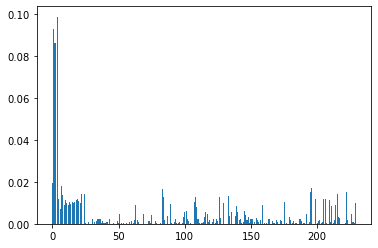

In [37]:
#Finding the most important features of the dataset
features1 = clf.feature_importances_
print(features1)
plt.bar(x = range(len(features1)), height=features1)
plt.show()

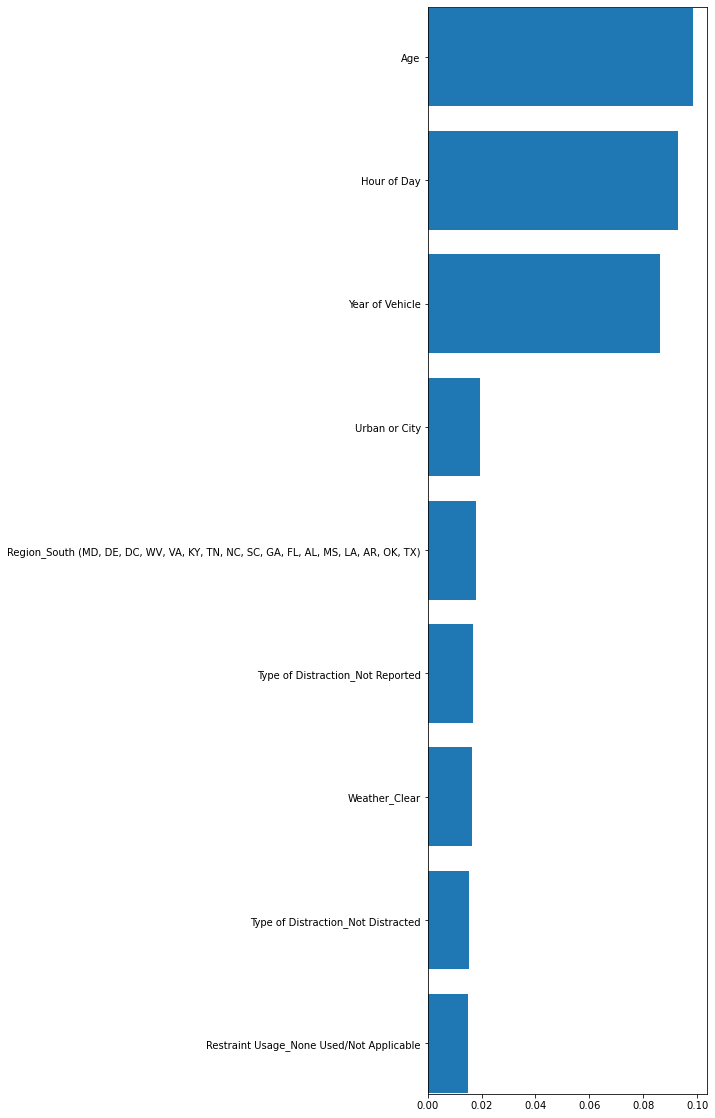

In [38]:
# Use the following code to plot the most important features
features = sorted(zip(X.columns, features1), key = lambda x: x[1])[221:231]
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(5,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [39]:
# Use the following code to plot the most important features
features = sorted(zip(X.columns, features1), key = lambda x: x[1])[221:231]
#cols = [f[0] for f in features]
#width = [f[1] for f in features]
len(features)

9

In [40]:
#Fitting most important features to a model
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False,

In [41]:
#Training and testing the selected features
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y)

In [42]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy="auto").fit_resample(
    X_selected_train, y_train
)
Counter(y_resampled)

Counter({0.0: 80333, 1.0: 80333})

In [43]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [44]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_selected_test)
balanced_accuracy_score(y_test, y_pred)

0.7840322373385085

In [45]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[21610,  5130],
       [  109,   345]], dtype=int64)

In [46]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.99      0.81      0.76      0.89      0.78      0.62     26740
        1.0       0.06      0.76      0.81      0.12      0.78      0.61       454

avg / total       0.98      0.81      0.76      0.88      0.78      0.62     27194

